# Time Series Analysis in Python

## Correlation and Autocorrelation

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

### A "Thin" Application of Time Series

In [11]:
diet = pd.read_csv('diet.txt', parse_dates=['Date'])

In [12]:
diet

,Date,diet
0,2011-06-26,70
1,2011-07-03,71
2,2011-07-10,73
3,2011-07-17,74
4,2011-07-24,72
...,...,...
256,2016-05-22,62
257,2016-05-29,62
258,2016-06-05,62
259,2016-06-12,58


In [13]:
diet.set_index('Date', inplace=True)

In [14]:
diet.index = pd.to_datetime(diet.index)

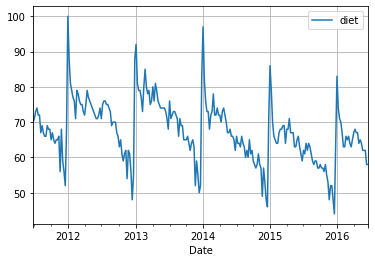

In [17]:
diet.plot(grid=True)
plt.show()

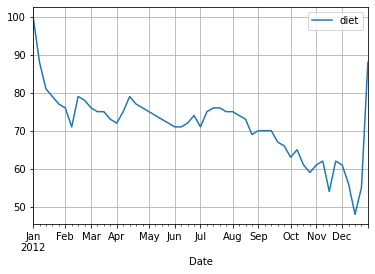

In [20]:

diet2012 = diet.loc['2012']


diet2012.plot(grid=True)
plt.show()

### Merging Time Series With Different Dates

In [22]:
stocks = pd.read_csv('SP500.txt')

In [23]:
bonds = pd.read_csv('US10Y.txt')

In [27]:
stocks.set_index('observation_date', inplace=True)

In [28]:
bonds.set_index('observation_date', inplace=True)

In [25]:
bonds.head()

,observation_date,US10Y
0,2007-06-08,5.12
1,2007-06-11,5.14
2,2007-06-12,5.26
3,2007-06-13,5.20
4,2007-06-14,5.23


In [26]:
stocks.head()

,observation_date,SP500
0,2007-06-11,1509.12
1,2007-06-12,1493.00
2,2007-06-13,1515.67
3,2007-06-14,1522.97
4,2007-06-15,1532.91


In [29]:

set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)


print(set_stock_dates - set_bond_dates)


stocks_and_bonds = stocks.join(bonds, how='inner')

{'2007-11-12', '2013-10-14', '2012-11-12', '2015-11-11', '2011-11-11', '2008-10-13', '2015-10-12', '2011-10-10', '2017-06-09', '2016-10-10', '2014-10-13', '2014-11-11', '2013-11-11', '2007-10-08', '2012-10-08', '2008-11-11', '2016-11-11', '2010-10-11', '2009-10-12', '2010-11-11', '2009-11-11'}


In [31]:
stocks_and_bonds.head()

,SP500,US10Y
observation_date,,
2007-06-11,1509.12,5.14
2007-06-12,1493.00,5.26
2007-06-13,1515.67,5.20
2007-06-14,1522.97,5.23
2007-06-15,1532.91,5.16


### Correlation of Stocks and Bonds

Correlation of stocks and interest rates:  0.4119448886249272


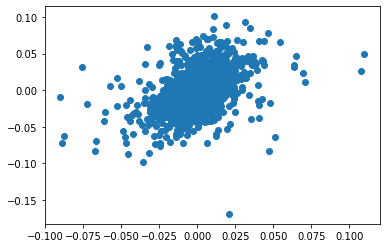

In [32]:
returns = stocks_and_bonds.pct_change()


correlation = returns['SP500'].corr(returns['US10Y'])
print("Correlation of stocks and interest rates: ", correlation)


plt.scatter(x=returns.SP500, y=returns.US10Y)
plt.show()

In [33]:
returns.head()

,SP500,US10Y
observation_date,,
2007-06-11,NaN,NaN
2007-06-12,-0.010682,0.023346
2007-06-13,0.015184,-0.011407
2007-06-14,0.004816,0.005769
2007-06-15,0.006527,-0.013384


### Flying Saucers Aren't Correlated to Flying Markets

In [44]:
dji = pd.read_csv('data/DJI.csv', parse_dates=['Date'], index_col='Date')

In [45]:
dji.head()

,Value
Date,
1941-01-01,110.96
1942-01-01,119.40
1943-01-01,135.89
1944-01-01,152.32
1945-01-01,192.91


In [40]:
ufo = pd.read_csv('UFO.csv', parse_dates=['Date'], index_col='Date')

In [41]:
ufo.head()

,Value
Date,
1941-01-01,1
1942-01-01,2
1943-01-01,9
1944-01-01,9
1945-01-01,9


In [46]:
levels = ufo.join(dji, how='inner', lsuffix='_DJI', rsuffix='_UFO')

In [48]:
correlation1 = levels['Value_DJI'].corr(levels['Value_UFO'])
print("Correlation of levels: ", correlation1)


changes = levels.pct_change()
correlation2 = changes['Value_DJI'].corr(changes['Value_UFO'])
print("Correlation of changes: ", correlation2)

Correlation of levels:  0.9399762210726431
Correlation of changes:  0.06026935462405376
